In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [4]:
#reading data set
apple_stk=pd.read_csv("AAPL.csv")

In [5]:
apple_stk

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


# Splitting Data to Train & Test

In [6]:
a = apple_stk
size = int(len(a) * 0.75)
print(size)
Train, Test = a[0:size], a[size:len(a)]

1508


In [7]:
#splitting data to train & test
X = apple_stk['Close'].values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]

In [8]:
Train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
1503,2017-12-21,174.169998,176.020004,174.100006,175.009995,168.705246,20949900
1504,2017-12-22,174.679993,175.419998,174.500000,175.009995,168.705246,16349400
1505,2017-12-26,170.800003,171.470001,169.679993,170.570007,164.425217,33185500
1506,2017-12-27,170.100006,170.779999,169.710007,170.600006,164.454132,21498200


In [9]:
Test

,Date,Open,High,Low,Close,Adj Close,Volume
1508,2017-12-29,170.520004,170.589996,169.220001,169.229996,163.133469,25999900
1509,2018-01-02,170.160004,172.300003,169.259995,172.259995,166.054321,25555900
1510,2018-01-03,172.529999,174.550003,171.960007,172.229996,166.025375,29517900
1511,2018-01-04,172.539993,173.470001,172.080002,173.029999,166.796555,22434600
1512,2018-01-05,173.440002,175.369995,173.050003,175.000000,168.695572,23660000
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


We have observed trend and seasonality in the data set clearly, so we can apply data driven models like simple exponential smoothing, holts method, holts winter methods to build a model 

In [10]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp) 

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Simple Exponential Method

In [12]:
ses_model = SimpleExpSmoothing(Train["Close"]).fit(smoothing_level=0.2)
pred_ses_train = ses_model.predict(start = Train.index[0],end = Train.index[-1])
pred_ses_test = ses_model.predict(start = Test.index[0],end = Test.index[-1])
print("Train MAPE :", MAPE(pred_ses_train,Train.Close))
print("Test MAPE :",MAPE(pred_ses_test,Test.Close))

Train MAPE : 2.0325931911163178
Test MAPE : 13.372186797027183


In [13]:
pred_ses_train

0        59.935694
1        59.697984
2        59.570959
3        59.600481
4        59.748956
           ...    
1503    173.395166
1504    173.718132
1505    173.976505
1506    173.295205
1507    172.756165
Length: 1508, dtype: float64

In [14]:
pred_ses_test

1508    172.420933
1509    172.420933
1510    172.420933
1511    172.420933
1512    172.420933
           ...    
2006    172.420933
2007    172.420933
2008    172.420933
2009    172.420933
2010    172.420933
Length: 503, dtype: float64

In [15]:
rmse_ses_train = sqrt(mean_squared_error(Train.Close, pred_ses_train))
print('Train RMSE: %.3f' % rmse_ses_train)
rmse_ses_test = sqrt(mean_squared_error(Test.Close, pred_ses_test))
print('Test RMSE: %.3f' % rmse_ses_test)

Train RMSE: 2.587
Test RMSE: 39.475


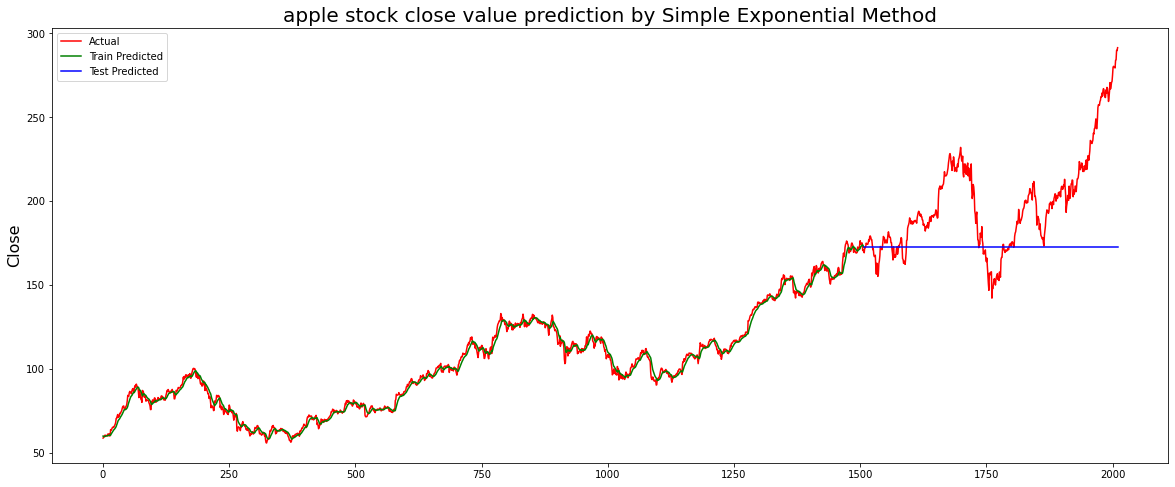

In [16]:
plt.figure(figsize=(20,8))
plt.plot(apple_stk.Close, color='red',label="Actual")
plt.plot(pred_ses_train, color='green',label="Train Predicted")
plt.plot(pred_ses_test, color='blue', label="Test Predicted",)
plt.title('apple stock close value prediction by Simple Exponential Method', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

# Holt method

In [17]:
# Holt method 
hw_model = Holt(Train["Close"]).fit(smoothing_level=0.2, smoothing_trend=0.15)
pred_hw_train = hw_model.predict(start = Train.index[0],end = Train.index[-1])
pred_hw_test = hw_model.predict(start = Test.index[0],end = Test.index[-1])
print("Train MAPE", MAPE(pred_hw_train,Train.Close))
print("Test MAPE", MAPE(pred_hw_test,Test.Close))

Train MAPE 1.973764708790561
Test MAPE 10.652576620912882


In [18]:
pred_hw_train

0        58.660643
1        58.868414
2        59.103608
3        59.441354
4        59.863453
           ...    
1503    173.533365
1504    174.135629
1505    174.643672
1506    174.039898
1507    173.459682
Length: 1508, dtype: float64

In [19]:
rmse_hw_train = sqrt(mean_squared_error(Train.Close, pred_hw_train))
rmse_hw_test = sqrt(mean_squared_error(Test.Close, pred_hw_test))
print('Train RMSE: %.3f' % rmse_hw_train)
print('Test RMSE: %.3f' % rmse_hw_test)

Train RMSE: 2.512
Test RMSE: 31.287


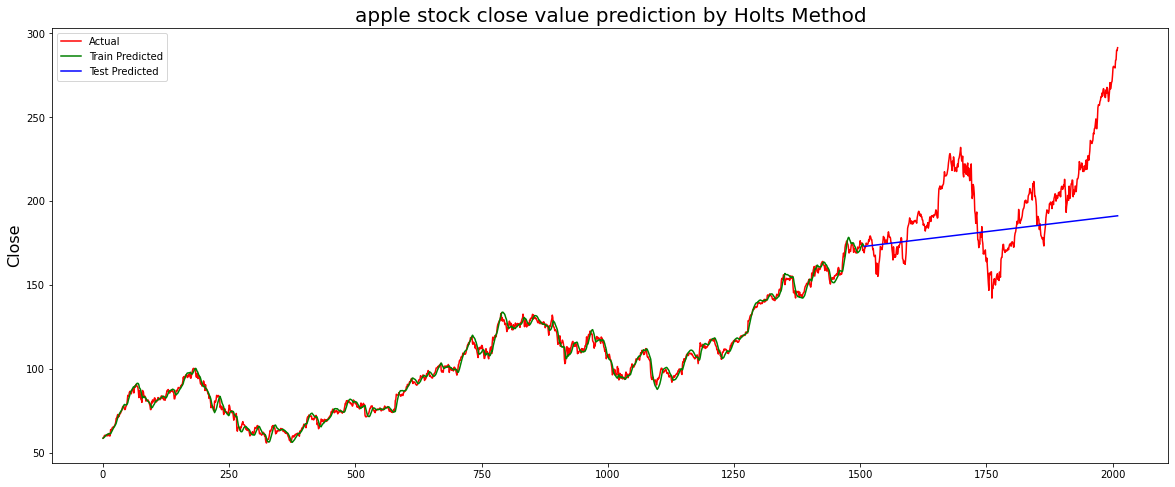

In [20]:
plt.figure(figsize=(20,8))
plt.plot(apple_stk.Close, color='red',label='Actual')
plt.plot(pred_hw_train, color='green',label='Train Predicted')
plt.plot(pred_hw_test, color='blue',label='Test Predicted')
plt.title('apple stock close value prediction by Holts Method', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

# Holts winter exponential smoothing with additive seasonality and additive trend

In [21]:
hwe_model_add_sea = ExponentialSmoothing(Train["Close"],seasonal="add",trend="add",seasonal_periods=21).fit()
pred_hwe_add_sea_train = hwe_model_add_sea.predict(start = Train.index[0],end = Train.index[-1])
pred_hwe_add_sea_test = hwe_model_add_sea.predict(start = Test.index[0],end = Test.index[-1])
print("MAPE for Train", MAPE(pred_hwe_add_sea_train,Train.Close))
print("MAPE for Test", MAPE(pred_hwe_add_sea_test,Test.Close)) 

MAPE for Train 1.102644045460776
MAPE for Test 9.117924250183375


In [22]:
hwe_model_add_sea = ExponentialSmoothing(Train["Close"],seasonal="add",trend="add",seasonal_periods=63).fit()
pred_hwe_add_sea_train = hwe_model_add_sea.predict(start = Train.index[0],end = Train.index[-1])
pred_hwe_add_sea_test = hwe_model_add_sea.predict(start = Test.index[0],end = Test.index[-1])
print("MAPE for Train", MAPE(pred_hwe_add_sea_train,Train.Close))
print("MAPE for Test", MAPE(pred_hwe_add_sea_test,Test.Close)) 

MAPE for Train 1.1000482793454498
MAPE for Test 9.085095004524423


In [23]:
rmse_hw_add_sea_train = sqrt(mean_squared_error(Train.Close, pred_hwe_add_sea_train))
rmse_hw_add_sea_test = sqrt(mean_squared_error(Test.Close, pred_hwe_add_sea_test))
print('Train RMSE: %.3f' % rmse_hw_add_sea_train)
print('Test RMSE: %.3f' % rmse_hw_add_sea_test)


Train RMSE: 1.513
Test RMSE: 25.707


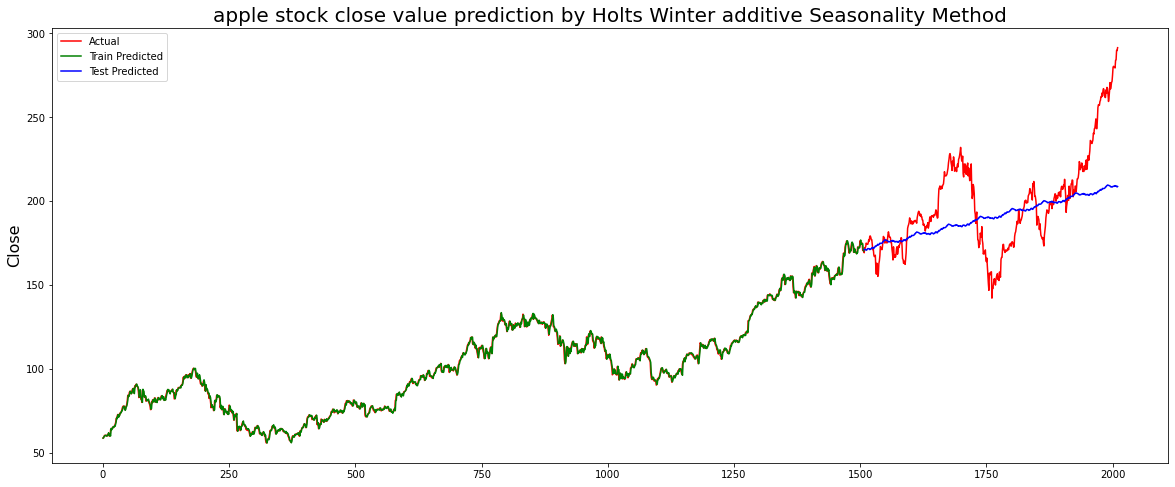

In [24]:
plt.figure(figsize=(20,8))
plt.plot(apple_stk.Close, color='red',label='Actual')
plt.plot(pred_hwe_add_sea_train, color='green',label='Train Predicted')
plt.plot(pred_hwe_add_sea_test, color='blue',label='Test Predicted')
plt.title('apple stock close value prediction by Holts Winter additive Seasonality Method', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

In [25]:
hwe_model_add_sea = ExponentialSmoothing(Train["Close"],seasonal="add",trend="add",seasonal_periods=126).fit() #add the trend to the model
pred_hwe_add_sea_train = hwe_model_add_sea.predict(start = Train.index[0],end = Train.index[-1])
pred_hwe_add_sea_test = hwe_model_add_sea.predict(start = Test.index[0],end = Test.index[-1])
print("MAPE for Train", MAPE(pred_hwe_add_sea_train,Train.Close))
print("MAPE for Test", MAPE(pred_hwe_add_sea_test,Test.Close)) 

MAPE for Train 1.0862749865192194
MAPE for Test 8.910575538048686


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [26]:
hwe_model_add_sea = ExponentialSmoothing(Train["Close"],seasonal="add",trend="add",seasonal_periods=252).fit() #add the trend to the model
pred_hwe_add_sea_train = hwe_model_add_sea.predict(start = Train.index[0],end = Train.index[-1])
pred_hwe_add_sea_test = hwe_model_add_sea.predict(start = Test.index[0],end = Test.index[-1])
print("MAPE for Train", MAPE(pred_hwe_add_sea_train,Train.Close))
print("MAPE for Test", MAPE(pred_hwe_add_sea_test,Test.Close)) 

MAPE for Train 1.0640498889784946
MAPE for Test 8.815889475425509


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [27]:
rmse_hw_add_sea_train = sqrt(mean_squared_error(Train.Close, pred_hwe_add_sea_train))
rmse_hw_add_sea_test = sqrt(mean_squared_error(Test.Close, pred_hwe_add_sea_test))
print('Train RMSE: %.3f' % rmse_hw_add_sea_train)
print('Test RMSE: %.3f' % rmse_hw_add_sea_test)


Train RMSE: 1.418
Test RMSE: 24.860


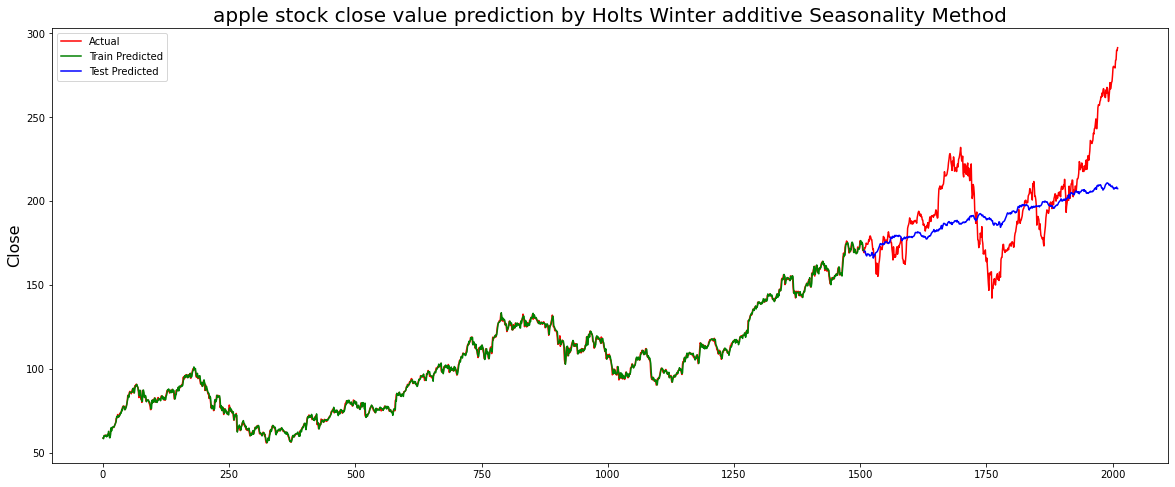

In [28]:
plt.figure(figsize=(20,8))
plt.plot(apple_stk.Close, color='red',label='Actual')
plt.plot(pred_hwe_add_sea_train, color='green',label='Train Predicted')
plt.plot(pred_hwe_add_sea_test, color='blue',label='Test Predicted')
plt.title('apple stock close value prediction by Holts Winter additive Seasonality Method', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [29]:
hwe_model_mul_sea = ExponentialSmoothing(Train["Close"],seasonal="mul",trend="add",seasonal_periods=21).fit() 
pred_hwe_mul_sea_train = hwe_model_mul_sea.predict(start = Train.index[0],end = Train.index[-1])
pred_hwe_mul_sea_test = hwe_model_mul_sea.predict(start = Test.index[0],end = Test.index[-1])
print("MAPE for Train", MAPE(pred_hwe_mul_sea_train,Train.Close))
print("MAPE for Test", MAPE(pred_hwe_mul_sea_test,Test.Close)) 


MAPE for Train 1.1048239801135165
MAPE for Test 9.117669611578616


In [30]:
hwe_model_mul_sea = ExponentialSmoothing(Train["Close"],seasonal="mul",trend="add",seasonal_periods=63).fit() 
pred_hwe_mul_sea_train = hwe_model_mul_sea.predict(start = Train.index[0],end = Train.index[-1])
pred_hwe_mul_sea_test = hwe_model_mul_sea.predict(start = Test.index[0],end = Test.index[-1])
print("MAPE for Train", MAPE(pred_hwe_mul_sea_train,Train.Close))
print("MAPE for Test", MAPE(pred_hwe_mul_sea_test,Test.Close)) 


MAPE for Train 1.1017516289573805
MAPE for Test 9.097187374812522


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [31]:
rmse_hw_mul_sea_train = sqrt(mean_squared_error(Train.Close, pred_hwe_mul_sea_train))
rmse_hw_mul_sea_test = sqrt(mean_squared_error(Test.Close, pred_hwe_mul_sea_test))
print('Train RMSE: %.3f' % rmse_hw_mul_sea_train)
print('Test RMSE: %.3f' % rmse_hw_mul_sea_test)


Train RMSE: 1.505
Test RMSE: 25.378


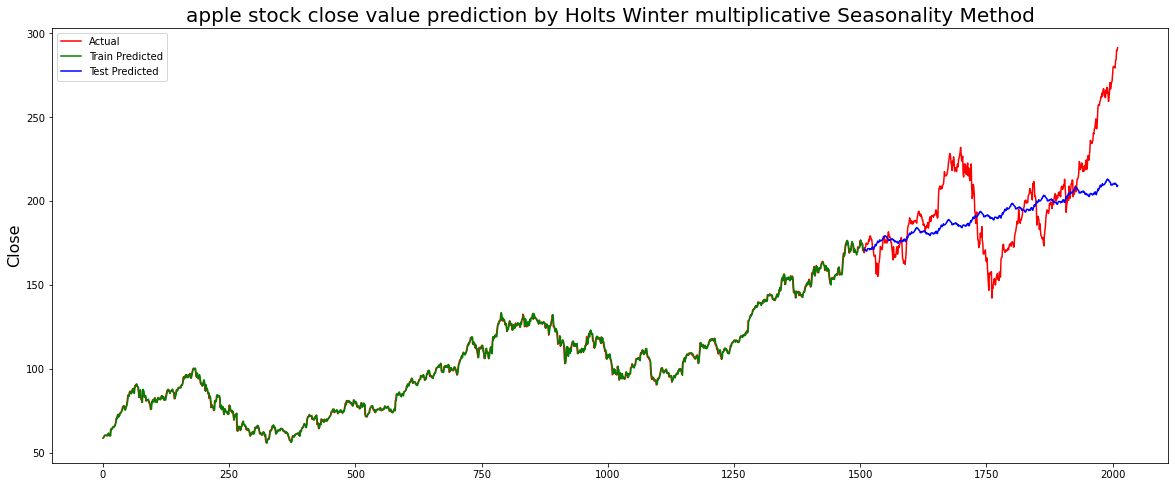

In [32]:
plt.figure(figsize=(20,8))
plt.plot(apple_stk.Close, color='red',label='Actual')
plt.plot(pred_hwe_mul_sea_train, color='green',label='Train Predicted')
plt.plot(pred_hwe_mul_sea_test, color='blue',label='Test Predicted')
plt.title('apple stock close value prediction by Holts Winter multiplicative Seasonality Method', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

In [33]:
hwe_model_mul_sea = ExponentialSmoothing(Train["Close"],seasonal="mul",trend="add",seasonal_periods=126).fit() 
pred_hwe_mul_sea_train = hwe_model_mul_sea.predict(start = Train.index[0],end = Train.index[-1])
pred_hwe_mul_sea_test = hwe_model_mul_sea.predict(start = Test.index[0],end = Test.index[-1])
print("MAPE for Train", MAPE(pred_hwe_mul_sea_train,Train.Close))
print("MAPE for Test", MAPE(pred_hwe_mul_sea_test,Test.Close)) 

MAPE for Train 1.1429550226381857
MAPE for Test 9.268099134496893


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [34]:
hwe_model_mul_sea = ExponentialSmoothing(Train["Close"],seasonal="mul",trend="add",seasonal_periods=252).fit() 
pred_hwe_mul_sea_train = hwe_model_mul_sea.predict(start = Train.index[0],end = Train.index[-1])
pred_hwe_mul_sea_test = hwe_model_mul_sea.predict(start = Test.index[0],end = Test.index[-1])
print("MAPE for Train", MAPE(pred_hwe_mul_sea_train,Train.Close))
print("MAPE for Test", MAPE(pred_hwe_mul_sea_test,Test.Close)) 

MAPE for Train 1.098853456620375
MAPE for Test 8.563933679671969


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [35]:
rmse_hw_mul_sea_train = sqrt(mean_squared_error(Train.Close, pred_hwe_mul_sea_train))
rmse_hw_mul_sea_test = sqrt(mean_squared_error(Test.Close, pred_hwe_mul_sea_test))
print('Train RMSE: %.3f' % rmse_hw_mul_sea_train)
print('Test RMSE: %.3f' % rmse_hw_mul_sea_test)


Train RMSE: 1.512
Test RMSE: 23.776


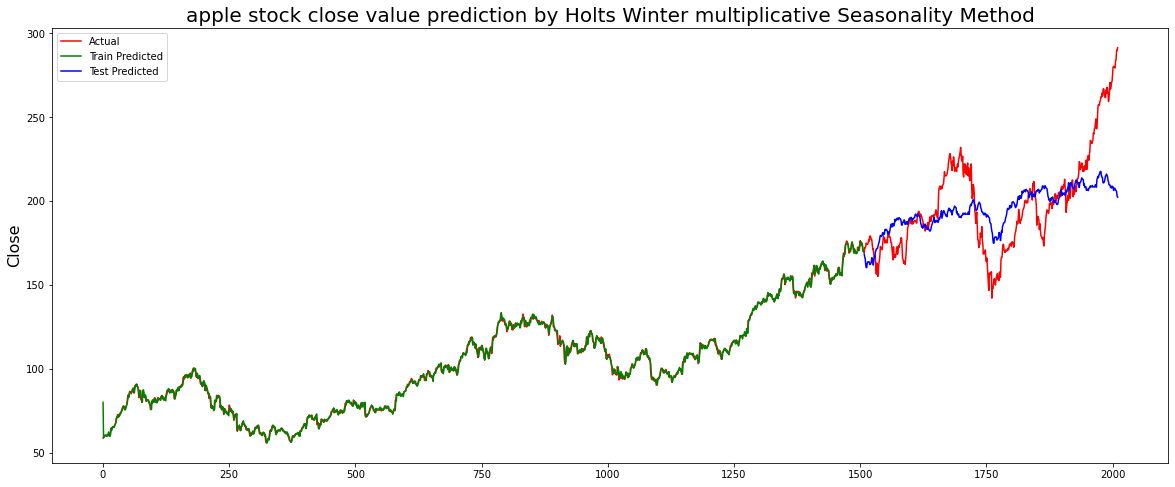

In [36]:
plt.figure(figsize=(20,8))
plt.plot(apple_stk.Close, color='red',label='Actual')
plt.plot(pred_hwe_mul_sea_train, color='green',label='Train Predicted')
plt.plot(pred_hwe_mul_sea_test, color='blue',label='Test Predicted')
plt.title('apple stock close value prediction by Holts Winter multiplicative Seasonality Method', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

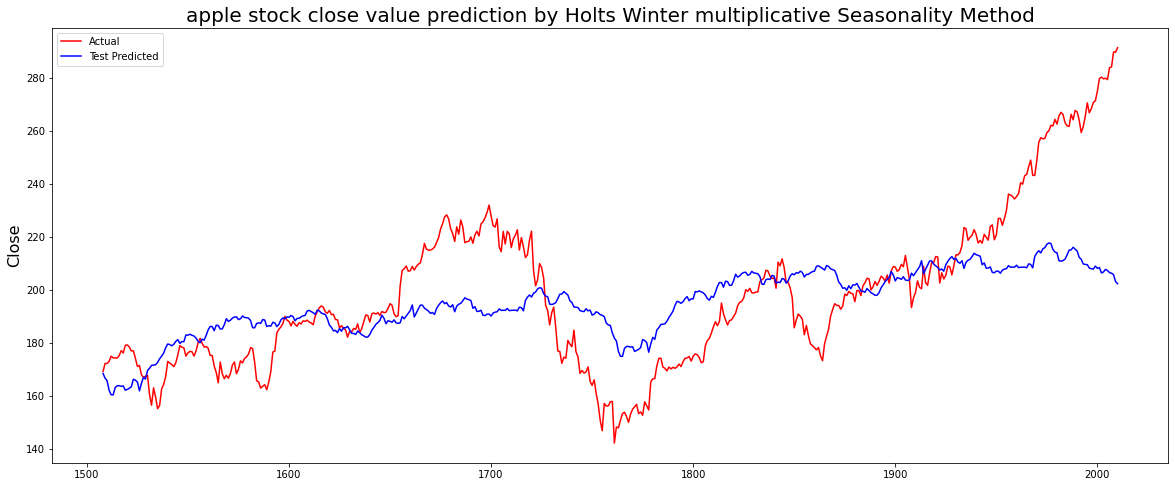

In [37]:
plt.figure(figsize=(20,8))
plt.plot(Test['Close'], color='red',label='Actual')
plt.plot(pred_hwe_mul_sea_test, color='blue',label='Test Predicted')
plt.title('apple stock close value prediction by Holts Winter multiplicative Seasonality Method', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

As per above model results,  we can see say holts winter multiplicative with annual seasonality is giving good results, so we can go for final model building and forecasting with this model

# Holts Winter Multiplicative Seasonality model combining train and test

In [38]:
final_hwe_model_mul_add = ExponentialSmoothing(apple_stk["Close"],seasonal="mul",trend="add",seasonal_periods=252).fit()
final_pred_hwe_mul_add = final_hwe_model_mul_add.predict(start = apple_stk.index[0],end = apple_stk.index[-1])
print("MAPE :",MAPE(final_pred_hwe_mul_add, apple_stk.Close))

MAPE : 1.14882630022525


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [39]:
rmse_final = sqrt(mean_squared_error(apple_stk.Close, final_pred_hwe_mul_add))
print('RMSE: %.3f' % rmse_final)

RMSE: 2.002


2011    291.284871
2012    287.650815
2013    279.781469
2014    280.326647
2015    274.311478
2016    271.515200
2017    272.172008
2018    274.648526
2019    274.507970
2020    274.136870
2021    275.782254
2022    276.320907
2023    276.677289
2024    277.112280
2025    275.550748
2026    275.487882
2027    277.432043
2028    277.949269
2029    274.546505
2030    270.664843
2031    274.568016
2032    276.248999
2033    275.431170
2034    279.672128
2035    278.156067
2036    276.894718
2037    278.276094
2038    277.102239
2039    275.977518
2040    278.413642
dtype: float64


<AxesSubplot:>

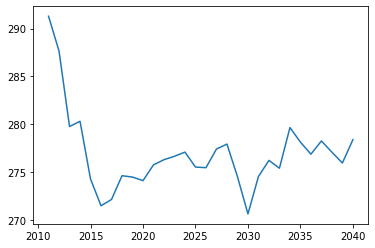

In [40]:
#Forecasting for next 30 time periods
final_forecast=final_hwe_model_mul_add.forecast(30)
print(final_forecast)
final_forecast.plot()

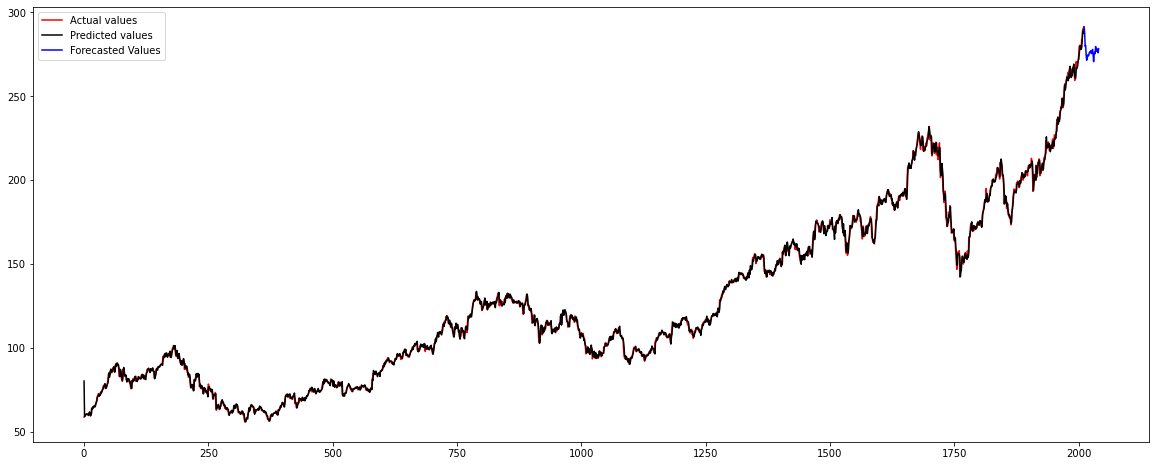

In [41]:
plt.figure(figsize=(20,8))
plt.plot(apple_stk.Close, color='red',label='Actual values')
plt.plot(final_pred_hwe_mul_add, color='black',label='Predicted values')
plt.plot(final_forecast, color='blue',label='Forecasted Values')
plt.legend()
plt.show()

2011    291.284871
2012    287.650815
2013    279.781469
2014    280.326647
2015    274.311478
           ...    
2258    314.885753
2259    313.639666
2260    318.521355
2261    315.820659
2262    315.859186
Length: 252, dtype: float64


<AxesSubplot:>

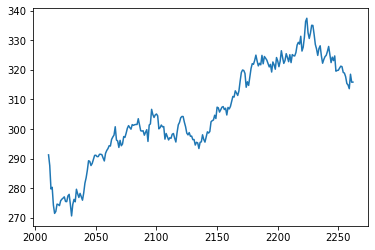

In [44]:
#Forecasting for next 252 time periods
final_forecast=final_hwe_model_mul_add.forecast(252)
print(final_forecast)
final_forecast.plot()

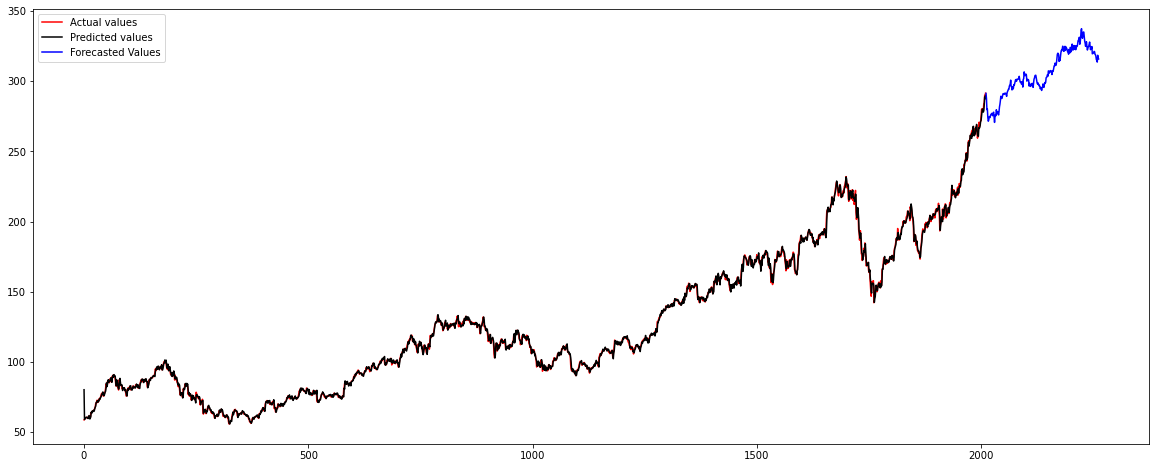

In [45]:
plt.figure(figsize=(20,8))
plt.plot(apple_stk.Close, color='red',label='Actual values')
plt.plot(final_pred_hwe_mul_add, color='black',label='Predicted values')
plt.plot(final_forecast, color='blue',label='Forecasted Values')
plt.legend()
plt.show()